In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Admission Predict.xlsx')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Y
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
X = df['GRE Score']
y = df['Y']*100

In [5]:
def average(list):
    total = 0
    
    for i in range(len(list)):
        total += list[i]
        i += 1
        
    avg = total / int(len(list))
    return avg       

In [6]:
def Ordinary_Least_Squares(X, y):
    X_avg = average(X)
    y_avg = average(y)
    
    top = 0
    bottom = 0
    
    for i in range(len(X)):
        top += (X[i] - X_avg) * (y[i] - y_avg)
        bottom += (X[i] - X_avg)**2
        
    m = top / bottom 
    b = y_avg - (m * X_avg)
    
    return m, b, top, bottom

In [7]:
m, b, top, bottom = Ordinary_Least_Squares(X, y)
print('b:', b)
print('m:', m)
print('top:', top)
print('bottom:', bottom)

b: -243.6084244851054
m: 0.997588202568138
top: 52399.494999999966
bottom: 52526.1775


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

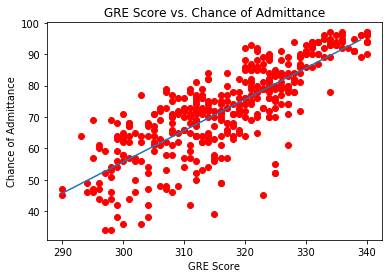

In [9]:
plt.plot(df['GRE Score'], df['Y']*100, 'ro')

# axes = plt.gca()
# x_vals = np.array(axes.get_xlim())
# plt.plot(x_vals, m * x_vals + b)

x_vals = np.arange(np.amin(X),np.amax(X))
plt.plot(x_vals, m * x_vals + b)

plt.xlabel("GRE Score")
plt.ylabel("Chance of Admittance")
plt.title("GRE Score vs. Chance of Admittance")

plt.show()

# Finding R^2

In [10]:
def R2(X, y):
    top = 0
    bottom = 0

    for i in range(len(X)):
        pred = m * X[i] + b
        
        top += (y[i] - pred) ** 2
        bottom += (y[i] - average(y)) ** 2
        
    R2 = 1 - (top / bottom)
    return R2

In [11]:
R2(X, y)

0.6441835498438337